# Spam Email Detection
This notebook trains multiple models to classify emails as spam or not spam.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

## Load and Explore the Dataset

In [8]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['Category', 'Message']]
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Preprocess the Data

In [9]:
X = df['Message']
y = df['Category']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((4457, 5000), (1115, 5000))

## Train and Evaluate Models

In [10]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'KNN': KNeighborsClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

results

{'Logistic Regression': 0.9623318385650225,
 'Random Forest': 0.9829596412556054,
 'AdaBoost': 0.9076233183856502,
 'KNN': 0.9210762331838565}

## Model Performance

In [11]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'### {name} ###')
    print(classification_report(y_test, y_pred))


### Logistic Regression ###
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.72      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

### Random Forest ###
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

### AdaBoost ###
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       966
           1       0.93      0.34      0.49       149

    accuracy                           0.91      1115
   macro avg       0.92      0.67      0.72      1115
weighte

## Model Accuracy Comparison (Graph)

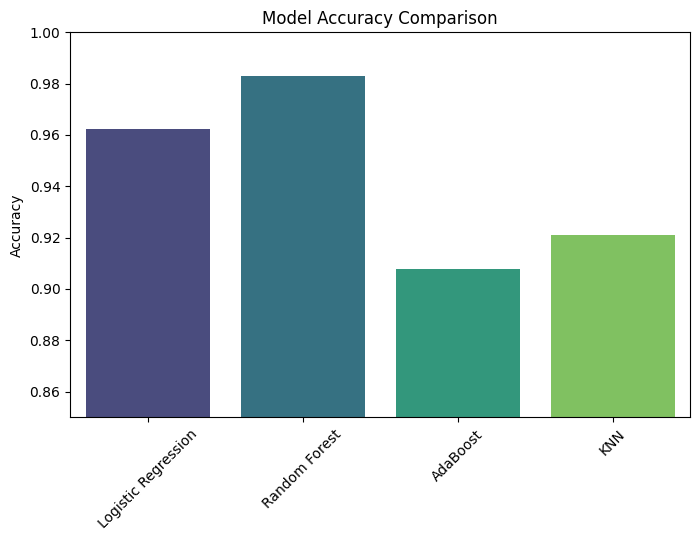

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot model accuracy comparison
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.ylim(0.85, 1.0)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()
